# Pre - Requesistes

We started out by participating in the mapless driving track of the cvpr 2024 challenge. Further details about the challenge can be found [here](https://opendrivelab.com/challenge2024/#mapless_driving)

Traditionally when we look at autonomous driving there are several challenges involved. Safety being the foremost and costs coming in at a close second. 
This challenge could be understood as a mix of the two problem statements that we are working on. 


To begin with, here are a few topics that would be good to familiarize yourself with when working on the problem statement.
- Lane Topology
- Transformers 
- Object detection using Transformers (DeTR)
- Positional encoding transformers (PeTR)
- Ego center of Vehicles
- Camera Properties (Intrnsic, Extrinsic)
- Basic Image Transformation(Transposing, Inverting, changing prespective)
- Monocular Depth Perception
- Camera View vs World View
    
 These topics closely relate to the problem at hand.
    

# Problem Statement

Traditionally, autonomous driving has been controlled mostly by LIDAR, Ultrasonic Sensors and Cameras. The cost associated with LIDAR and long range Ultrasonic Sensors is high, since their calibration is delicate and they are not expected to break down while the car is moving. Whereas cameras are ubiquitous. 

They are being used in almost every aspect of life. They cost less, are more stable and require no calibration and are easy to manufacture and replace. This is mostly geared towards how cameras and Standard Definition maps can reduce the cost of making an autonomous driving vehicle. 



The first part of the problem is to accurately detect objects in images that are captured by positional cameras placed all around the moving vehicle, thereby creating a 360 view where all objects occur exactly once. 

For example, take these two images present here.

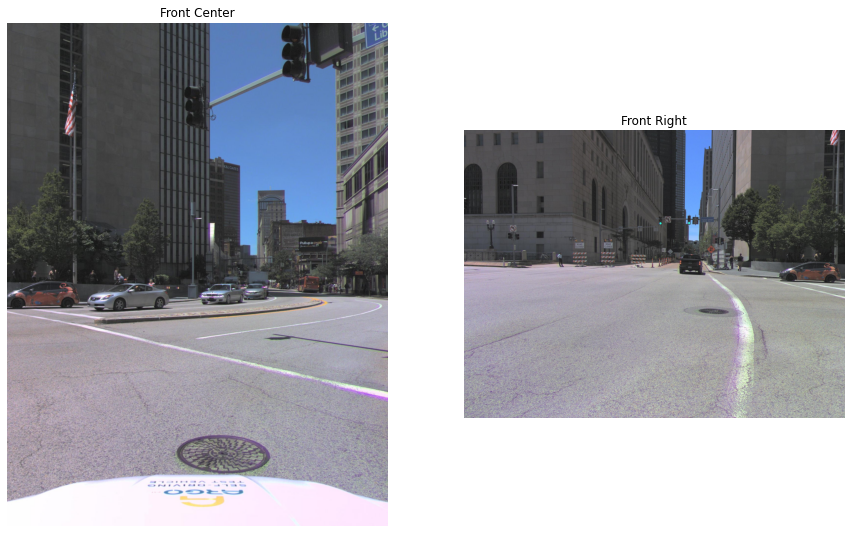

In [17]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


data_dict_subset_A = pd.read_pickle('../repo/OpenLane-V2/data/OpenLane-V2/data_dict_subset_A.pkl')
images = []
root_path = "../repo/OpenLane-V2/data/OpenLane-V2/data_files/"
frame1 = data_dict_subset_A[('train', '00000', '315967376899927209')]
for view in frame1['sensor'].keys():
    images.append(f"{root_path}{frame1['sensor'][view]['image_path']}")

front_center = Image.open(images[0])
front_right = Image.open(images[1])

fig, axes = plt.subplots(1, 2, figsize=(15, 15))

# Show the first image
axes[0].imshow(front_center)
axes[0].axis('off')  # Turn off axis
axes[0].set_title('Front Center')

# Show the second image
axes[1].imshow(front_right)
axes[1].axis('off')
axes[1].set_title('Front Right')

plt.show()


Few things to notice here are that the images we have for processing vary in aspect ratios. 

The problems with these two Images if we treat them individually are 
- _Objects are repeating_ : if we look carefully here, we see that one small car in the corner of the image is present in both pictures. Now if we are doing object detection at this level, it poses a problem both images would treat them as separate entities with will lower the accuracy that we have for object detection. 

- _Image Data missing_ : if we try and combine these two images, by any method, we will observe a loss of data, i.e. there will be some parts of the image that will not be filled in, which in turn poses another problem.



## What we want

The problem's first part is now to find a way to combine the different angles that we have for the vehicle, in order to find a way so that we can identify and keep track of objects as accurately as possilbe.  


# Dataset

Now that we have a basic understanding of the problem, we can start on how we will look at the dataset that was provided in the CVPR2204 competition. 

The name of the dataset is OpenLaneV2.

we have three different folders, i.e.
- test
- train
- validate

We can skip the `validate` folder here as it was used for validating the results of the challenge. 

The `test` and `train` datasets have an identical structure as I've listed below.

## SD Map
The `sdmap.json` comprises three types of SD map elements that can be used as sensor inputs.

```
[
    {
        'points':                           <list> -- list of 2D points in the BEV space
        'category':                         <str> -- type of the SD map element
                                                'road',
                                                'cross_walk',
                                                'side_walk',
    },
    ...
]
```


## Meta Data
The json files under the `info/` folder contain meta data and annotations for each frame.
Each file is formatted as follows:

```
{
    'version':                              <str> -- version
    'segment_id':                           <str> -- segment_id
    'meta_data': {
        'source':                           <str> -- name of the original dataset
        'source_id':                        <str> -- original identifier of the segment
    }
    'timestamp':                            <int> -- timestamp of the frame
    'sensor': {
        [camera]: {                         <str> -- name of the camera
            'image_path':                   <str> -- image path
            'extrinsic':                    <dict> -- extrinsic parameters of the camera, trasformation from camera frame to vehicle frame
            'intrinsic':                    <dict> -- intrinsic parameters of the camera
        },
        ...
    }                              
    'pose':                                 <dict> -- ego pose
    'annotation':                           <dict> -- annotations for the current frame
}
```

## Test , Train and Camera Angles

In total the `train` folders contains around 700 filders each labelled with a number in sequential order. 

Each of these folders has the `SD MAP` and `Meta Data(info)` folder

train
- 700 fodlers here
    - image
        - ring_front_center
            - 32 images each with their timestamp as their name in jpg format
        - ring_front_left
            - 32 images each with their timestamp as their name in jpg format

        - ring_front_right
            - 32 images each with their timestamp as their name in jpg format

        - ring_rear_right
            - 32 images each with their timestamp as their name in jpg format

        - ring_rear_right
            - 32 images each with their timestamp as their name in jpg format

        - ring_side_left
            - 32 images each with their timestamp as their name in jpg format

        - ring_side_right
            - 32 images each with their timestamp as their name in jpg format

    - info
    - sdmap.json

# Other Datasets for Reference

There are two more widely popular datasets that are used widely in every reasearch paper associated to these topics. 

- [NuScenes](https://www.nuscenes.org/nuscenes)

- [Waymo Open Dataset](https://waymo.com/open/)

We can look at these datasets also to get a better understanding of what we are dealing with but for this project, we will just be working with the OpenLaneV2 Dataset as these otehr other datasets have some parameters that would induce the use of sensors other than just cameras like
- Lidar
- ego pose
- sensor
- visibility
- hd map data

# Expectations


For this week, we will just look at how we can try and merge two or more pictures without losing data and without having duplicacy in the resulting image. 

OR 

There is a way to determine how overlapping objects are detected across multiple images.